### Implement naive bayes for binary class classification problem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/titanic.csv')
print(dataset.shape)
dataset.head()

(891, 12)


,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
dataset.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns', inplace=True)
dataset.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


male      577
female    314
Name: Sex, dtype: int64


(-1.1076137555765015,
 1.1135982299814629,
 -1.1118283194882173,
 1.1093836660697471)

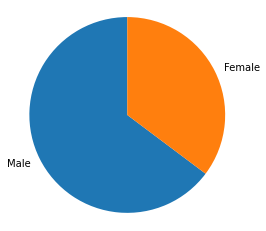

In [4]:
sex_count = dataset['Sex'].value_counts()
print(sex_count)
plt.pie(sex_count, labels=['Male', 'Female'], startangle=90)
plt.axis('square')

In [5]:
inputs = dataset.drop('Survived', axis='columns')
target = dataset.Survived
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [6]:
dummies = pd.get_dummies(inputs.Sex)
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [7]:
inputs = pd.concat([inputs, dummies], axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [8]:
inputs.drop(['Sex', 'male'], axis='columns', inplace=True)
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [9]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [10]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [11]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


####  Modelling

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3)

In [13]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [14]:
model.fit(x_train, y_train)

GaussianNB()

In [15]:
model.score(x_test, y_test)

0.7649253731343284

In [16]:
x_test[:10]

,Pclass,Age,Fare,female
117,2,29.000000,21.0000,0
164,3,1.000000,39.6875,0
890,3,32.000000,7.7500,0
335,3,29.699118,7.8958,0
324,3,29.699118,69.5500,0
624,3,21.000000,16.1000,0
658,2,23.000000,13.0000,0
646,3,19.000000,7.8958,0
424,3,18.000000,20.2125,0
437,2,24.000000,18.7500,1


In [17]:
y_test[:10]

117    0
164    0
890    0
335    0
324    0
624    0
658    0
646    0
424    0
437    1
Name: Survived, dtype: int64

#### Prediction

In [18]:
model.predict(x_test[:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [19]:
model.predict_proba(x_test[:10])

array([[0.9345814 , 0.0654186 ],
       [0.90491473, 0.09508527],
       [0.96957513, 0.03042487],
       [0.96953088, 0.03046912],
       [0.8677734 , 0.1322266 ],
       [0.96705854, 0.03294146],
       [0.93195992, 0.06804008],
       [0.9648827 , 0.0351173 ],
       [0.96423282, 0.03576718],
       [0.24140748, 0.75859252]])

Calculate the score using cross validation

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(), x_train, y_train, cv=5)

array([0.8       , 0.792     , 0.736     , 0.77419355, 0.77419355])